# Predicting the best Edmonton neighborhood location for a new restaurant

## A. Introduction

### A.1. Background and Problem Description

Edmonton, capital of Canada's Alberta province, sits on the North Saskatchewan River. The city had a population of 932,546 in 2016, making it Alberta's second-largest city and Canada's fifth-largest municipality. Also in 2016, Edmonton had a metropolitan population of 1,321,426, making it the sixth-largest census metropolitan area (CMA) in Canada. Edmonton is North America's northernmost metropolitan area with a present population over one million. Since I am a resident of Edmonton, I decided to use Edmonton as the research city in my project.

Due to cultural diversity that has been fueled by Canada's generous immigration policies, Edmonton is highly multicultural; more so because Edmonton is the major economic centre for the oil and gas industry. These provide favourable grounds for business opportunities, thus a highly competitive market. So, a careful analysis has to be carried out in order to make informed decisions on starting a new business here. Information derived from this analysis will provide deep knowledge of the neighborhoods that have a competitive edge. The target audience for this analysis are investors who are seeking to start a restaurant business in Edmonton.

Edmonton's cultural diversity also means the city is blessed with restaurants offering an array of international cuisines. In this very competitive market, a potential new French restaurant, ABC Ltd is faced with this problem:
Which neighbourhood will be the best location for the new French restaurant? The best locations that will be considered here will be the ones that have relatively few or no French restaurants, better accessibility to raw materials (in this case, ingredients used for cooking), and surrounded by more offices and professional venues.


Based on the problem, the following data will be used to solve the problem:

- List of all neighbourhoods in Edmonton. This was retrieved from Canada's geonames data available online on geonames.org. https://www.geonames.org/postalcode-search.html?q=Edmonton&country=CA&adminCode1=AB. This data was useful in this analysis in that it will give a big picture of all neighbourhoods available to explore. 

- The coordinates of the neighbourhoods and venues which were retrieved from the same geonames data. This was used to map the location of the venues. 

- The top 10 Venues of all Edmonton neighbourhoods. This was retrieved form the FourSquare location data. This data was used to cluster neighbourhoods into groups. 


## B. Data

#### Data Collection from geonames data

In [1]:
pip install geopy

     |████████████████████████████████| 102kB 15.1MB/s ta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install lxml

     |████████████████████████████████| 5.8MB 7.7MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install requests

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install BeautifulSoup4

     |████████████████████████████████| 102kB 17.1MB/s ta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [5]:
import numpy as np # library to handle data in a vectorized manner
import pandas as pd # library for data analsysis
import requests   # library to handle requests
from bs4 import BeautifulSoup
import json # library to handle JSON files

print('Libraries imported.')

Libraries imported.


In [6]:
#get the wikipedia page html and parse it

d = pd.read_html('https://www.geonames.org/postalcode-search.html?q=Edmonton&country=CA&adminCode1=AB')

In [7]:
len(d)  #shows there are 3 tables on the page

3

In [8]:
df = d[2] #get the 3rd table
df

,Unnamed: 0,Place,Code,Country,Admin1,Admin2,Admin3
0,1.0,Edmonton (Kaskitayo),T6J,Canada,Alberta,Edmonton,NaN
1,NaN,53.456/-113.521,53.456/-113.521,53.456/-113.521,53.456/-113.521,53.456/-113.521,53.456/-113.521
2,2.0,Edmonton Southwest,T6M,Canada,Alberta,Edmonton,NaN
3,NaN,53.459/-113.655,53.459/-113.655,53.459/-113.655,53.459/-113.655,53.459/-113.655,53.459/-113.655
4,3.0,Edmonton (Riverbend),T6R,Canada,Alberta,Edmonton,NaN
...,...,...,...,...,...,...,...
72,37.0,Edmonton (West Londonderry / East Calder),T5E,Canada,Alberta,Edmonton,NaN
73,NaN,53.745/-113.447,53.745/-113.447,53.745/-113.447,53.745/-113.447,53.745/-113.447,53.745/-113.447
74,38.0,Edmonton (North Capilano),T6A,Canada,Alberta,Edmonton,NaN
75,NaN,53.548/-113.432,53.548/-113.432,53.548/-113.432,53.548/-113.432,53.548/-113.432,53.548/-113.432


In [9]:
df.drop(df.columns[0], axis=1, inplace = True) 
df

,Place,Code,Country,Admin1,Admin2,Admin3
0,Edmonton (Kaskitayo),T6J,Canada,Alberta,Edmonton,NaN
1,53.456/-113.521,53.456/-113.521,53.456/-113.521,53.456/-113.521,53.456/-113.521,53.456/-113.521
2,Edmonton Southwest,T6M,Canada,Alberta,Edmonton,NaN
3,53.459/-113.655,53.459/-113.655,53.459/-113.655,53.459/-113.655,53.459/-113.655,53.459/-113.655
4,Edmonton (Riverbend),T6R,Canada,Alberta,Edmonton,NaN
...,...,...,...,...,...,...
72,Edmonton (West Londonderry / East Calder),T5E,Canada,Alberta,Edmonton,NaN
73,53.745/-113.447,53.745/-113.447,53.745/-113.447,53.745/-113.447,53.745/-113.447,53.745/-113.447
74,Edmonton (North Capilano),T6A,Canada,Alberta,Edmonton,NaN
75,53.548/-113.432,53.548/-113.432,53.548/-113.432,53.548/-113.432,53.548/-113.432,53.548/-113.432


In [10]:
# getting latitudes from the Place column
list = df["Place"].tolist()  #make "place" a list
del list[::2]                #remove every second elemnt to leave just coordinates
list

['53.456/-113.521',
 '53.459/-113.655',
 '53.457/-113.58',
 '53.462/-113.371',
 '53.415/-113.418',
 '53.6/-113.455',
 '53.543/-113.497',
 '53.544/-113.557',
 '53.546/-113.596',
 '53.563/-113.67',
 '53.585/-113.622',
 '53.565/-113.402',
 '53.631/-113.524',
 '53.637/-113.467',
 '53.522/-113.459',
 '53.521/-113.532',
 '53.461/-113.452',
 '53.459/-113.414',
 '53.465/-113.478',
 '53.581/-113.337',
 '53.611/-113.575',
 '53.418/-113.579',
 '53.519/-113.658',
 '53.735/-113.337',
 '53.571/-113.505',
 '53.537/-113.51',
 '53.585/-113.553',
 '53.518/-113.58',
 '53.658/-113.361',
 '53.491/-113.48',
 '53.508/-113.372',
 '53.563/-113.566',
 '53.513/-113.419',
 '53.551/-113.492',
 '53.375/-113.458',
 '53.593/-113.408',
 '53.745/-113.447',
 '53.548/-113.432']

In [11]:
df1 = df.iloc[::2]   #delete every other row in df

df1

,Place,Code,Country,Admin1,Admin2,Admin3
0,Edmonton (Kaskitayo),T6J,Canada,Alberta,Edmonton,NaN
2,Edmonton Southwest,T6M,Canada,Alberta,Edmonton,NaN
4,Edmonton (Riverbend),T6R,Canada,Alberta,Edmonton,NaN
6,Edmonton (Meadows),T6T,Canada,Alberta,Edmonton,NaN
8,Edmonton (Ellerslie),T6X,Canada,Alberta,Edmonton,NaN
10,Edmonton (Central Londonderry),T5C,Canada,Alberta,Edmonton,NaN
12,Edmonton (North Downtown),T5J,Canada,Alberta,Edmonton,NaN
14,Edmonton (Glenora / SW Downtown Fringe),T5N,Canada,Alberta,Edmonton,NaN
16,Edmonton (North Jasper Place),T5P,Canada,Alberta,Edmonton,NaN
18,Edmonton (West Northwest Industrial / Winterburn),T5S,Canada,Alberta,Edmonton,NaN


In [12]:
df2 = df1[:-1]
df2

,Place,Code,Country,Admin1,Admin2,Admin3
0,Edmonton (Kaskitayo),T6J,Canada,Alberta,Edmonton,NaN
2,Edmonton Southwest,T6M,Canada,Alberta,Edmonton,NaN
4,Edmonton (Riverbend),T6R,Canada,Alberta,Edmonton,NaN
6,Edmonton (Meadows),T6T,Canada,Alberta,Edmonton,NaN
8,Edmonton (Ellerslie),T6X,Canada,Alberta,Edmonton,NaN
10,Edmonton (Central Londonderry),T5C,Canada,Alberta,Edmonton,NaN
12,Edmonton (North Downtown),T5J,Canada,Alberta,Edmonton,NaN
14,Edmonton (Glenora / SW Downtown Fringe),T5N,Canada,Alberta,Edmonton,NaN
16,Edmonton (North Jasper Place),T5P,Canada,Alberta,Edmonton,NaN
18,Edmonton (West Northwest Industrial / Winterburn),T5S,Canada,Alberta,Edmonton,NaN


In [13]:
df2['Coordinates'] = list
df2.reset_index(drop=True, inplace=True)
df2

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Place,Code,Country,Admin1,Admin2,Admin3,Coordinates
0,Edmonton (Kaskitayo),T6J,Canada,Alberta,Edmonton,NaN,53.456/-113.521
1,Edmonton Southwest,T6M,Canada,Alberta,Edmonton,NaN,53.459/-113.655
2,Edmonton (Riverbend),T6R,Canada,Alberta,Edmonton,NaN,53.457/-113.58
3,Edmonton (Meadows),T6T,Canada,Alberta,Edmonton,NaN,53.462/-113.371
4,Edmonton (Ellerslie),T6X,Canada,Alberta,Edmonton,NaN,53.415/-113.418
5,Edmonton (Central Londonderry),T5C,Canada,Alberta,Edmonton,NaN,53.6/-113.455
6,Edmonton (North Downtown),T5J,Canada,Alberta,Edmonton,NaN,53.543/-113.497
7,Edmonton (Glenora / SW Downtown Fringe),T5N,Canada,Alberta,Edmonton,NaN,53.544/-113.557
8,Edmonton (North Jasper Place),T5P,Canada,Alberta,Edmonton,NaN,53.546/-113.596
9,Edmonton (West Northwest Industrial / Winterburn),T5S,Canada,Alberta,Edmonton,NaN,53.563/-113.67


In [14]:
df3 = pd.DataFrame(df2.Coordinates.str.split('/',1).tolist(),
                                   columns = ['Latitude','Longitude'])
df3

,Latitude,Longitude
0,53.456,-113.521
1,53.459,-113.655
2,53.457,-113.58
3,53.462,-113.371
4,53.415,-113.418
5,53.6,-113.455
6,53.543,-113.497
7,53.544,-113.557
8,53.546,-113.596
9,53.563,-113.67


In [15]:
edmonton = pd.concat([df2, df3], axis=1)
edmonton

,Place,Code,Country,Admin1,Admin2,Admin3,Coordinates,Latitude,Longitude
0,Edmonton (Kaskitayo),T6J,Canada,Alberta,Edmonton,NaN,53.456/-113.521,53.456,-113.521
1,Edmonton Southwest,T6M,Canada,Alberta,Edmonton,NaN,53.459/-113.655,53.459,-113.655
2,Edmonton (Riverbend),T6R,Canada,Alberta,Edmonton,NaN,53.457/-113.58,53.457,-113.58
3,Edmonton (Meadows),T6T,Canada,Alberta,Edmonton,NaN,53.462/-113.371,53.462,-113.371
4,Edmonton (Ellerslie),T6X,Canada,Alberta,Edmonton,NaN,53.415/-113.418,53.415,-113.418
5,Edmonton (Central Londonderry),T5C,Canada,Alberta,Edmonton,NaN,53.6/-113.455,53.6,-113.455
6,Edmonton (North Downtown),T5J,Canada,Alberta,Edmonton,NaN,53.543/-113.497,53.543,-113.497
7,Edmonton (Glenora / SW Downtown Fringe),T5N,Canada,Alberta,Edmonton,NaN,53.544/-113.557,53.544,-113.557
8,Edmonton (North Jasper Place),T5P,Canada,Alberta,Edmonton,NaN,53.546/-113.596,53.546,-113.596
9,Edmonton (West Northwest Industrial / Winterburn),T5S,Canada,Alberta,Edmonton,NaN,53.563/-113.67,53.563,-113.67


In [16]:
edmonton.drop(['Country', 'Admin1', 'Admin2', 'Admin3', 'Coordinates'], axis=1, inplace = True) 
edmonton.rename(columns={'Place': 'Neighborhood'}, inplace=True)

edmonton

,Neighborhood,Code,Latitude,Longitude
0,Edmonton (Kaskitayo),T6J,53.456,-113.521
1,Edmonton Southwest,T6M,53.459,-113.655
2,Edmonton (Riverbend),T6R,53.457,-113.58
3,Edmonton (Meadows),T6T,53.462,-113.371
4,Edmonton (Ellerslie),T6X,53.415,-113.418
5,Edmonton (Central Londonderry),T5C,53.6,-113.455
6,Edmonton (North Downtown),T5J,53.543,-113.497
7,Edmonton (Glenora / SW Downtown Fringe),T5N,53.544,-113.557
8,Edmonton (North Jasper Place),T5P,53.546,-113.596
9,Edmonton (West Northwest Industrial / Winterburn),T5S,53.563,-113.67


In [17]:
edmonton[['Latitude', 'Longitude']] = edmonton[['Latitude', 'Longitude']].astype(float)

In [18]:
edmonton.dtypes

Neighborhood     object
Code             object
Latitude        float64
Longitude       float64
dtype: object

In [19]:

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


In [20]:
#using geopy library to get latitude and longitude values of Edmonton city

address = 'Edmonton, Canada'

geolocator = Nominatim(user_agent="edm_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Edmonton are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Edmonton are 53.535411, -113.507996.


Now, let's visualize the neighborhoods by creating a map of Edmonton with Neighborhoods superimposed

In [21]:
# create map of Edmonton using latitude and longitude values
map_edmonton = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, code, neighborhood in zip(edmonton['Latitude'], edmonton['Longitude'], edmonton['Code'], edmonton['Neighborhood']):
    label = '{}, {}'.format(neighborhood, code)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_edmonton)  
    
map_edmonton

### Next, we are going to start utilizing the Foursquare API to explore the neighborhoods and segment them

### FourSquare data collection

In [22]:
CLIENT_ID = '4MZ4U1YKCDSQCP5CGALCWZYFTEU0GLKTJ1UBLYDD15CQZ1VI' # your Foursquare ID
CLIENT_SECRET = 'AI505REPCBBLDK4VR3MQASWG2LKOAL2Z3LZ4JO1RJUIEQMCK' # your Foursquare Secret
VERSION = '20191213' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 4MZ4U1YKCDSQCP5CGALCWZYFTEU0GLKTJ1UBLYDD15CQZ1VI
CLIENT_SECRET:AI505REPCBBLDK4VR3MQASWG2LKOAL2Z3LZ4JO1RJUIEQMCK


#### Exploring the first neighborhood, Kaskitayo with coordinates 53.456, -113.521

##### Getting the top 100 venues in a 500m radius:

In [23]:
# get the url
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 500 # define radius
neighborhood_latitude = 53.456
neighborhood_longitude = -113.521
# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id=4MZ4U1YKCDSQCP5CGALCWZYFTEU0GLKTJ1UBLYDD15CQZ1VI&client_secret=AI505REPCBBLDK4VR3MQASWG2LKOAL2Z3LZ4JO1RJUIEQMCK&v=20191213&ll=53.456,-113.521&radius=500&limit=100'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=4MZ4U1YKCDSQCP5CGALCWZYFTEU0GLKTJ1UBLYDD15CQZ1VI&client_secret=AI505REPCBBLDK4VR3MQASWG2LKOAL2Z3LZ4JO1RJUIEQMCK&v=20191213&ll=53.456,-113.521&radius=500&limit=100'

In [24]:
#examining the result with the 'get' request:

results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5dffe03fd03993001b4c11a2'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Blue Quill',
  'headerFullLocation': 'Blue Quill, Edmonton',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 12,
  'suggestedBounds': {'ne': {'lat': 53.460500004500005,
    'lng': -113.51345666563903},
   'sw': {'lat': 53.4514999955, 'lng': -113.52854333436098}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4b40079cf964a52080b425e3',
       'name': 'Bistecca Italian Steakhouse Wine Bar',
       'location': {'address': '2345 111 St.',
        'crossStreet': 'at Century Park',
        'lat': 53.45447427709589,
        'lng': -113.51484702814429,
       

In [25]:
# defining the function that extracts the category of the venues

def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [26]:
# clean the json and create a pandas dataframe

venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,Bistecca Italian Steakhouse Wine Bar,Steakhouse,53.454474,-113.514847
1,Sicilian Pasta Kitchen South,Italian Restaurant,53.453466,-113.525314
2,Spring Roll Kitchen,Vietnamese Restaurant,53.455403,-113.514724
3,Vinny's Pub,Pub,53.453520,-113.524898
4,Brewsters Century Park,Brewery,53.454629,-113.515185


In [27]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

12 venues were returned by Foursquare.


### Exploring all the neighborhoods in Edmonton

In [28]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Latitude', 
                  'Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [29]:
edmonton.dtypes

Neighborhood     object
Code             object
Latitude        float64
Longitude       float64
dtype: object

In [30]:
# Running the above function on each neighborhood

edmonton_venues = getNearbyVenues(names=edmonton['Neighborhood'],
                                   latitudes=edmonton['Latitude'],
                                   longitudes=edmonton['Longitude']
                                  )

Edmonton (Kaskitayo)
Edmonton Southwest
Edmonton (Riverbend)
Edmonton (Meadows)
Edmonton (Ellerslie)
Edmonton (Central Londonderry)
Edmonton (North Downtown)
Edmonton (Glenora / SW Downtown Fringe)
Edmonton (North Jasper Place)
Edmonton (West Northwest Industrial / Winterburn)
Edmonton (Central Mistatim)
Edmonton (Central Beverly)
Edmonton (East Castledowns)
Edmonton (West Lake District)
Edmonton (Central Bonnie Doon)
Edmonton (West University / Strathcona Place)
Edmonton (West Mill Woods)
Edmonton (East Mill Woods)
Edmonton (South Industrial)
Edmonton (North Clover Bar)
Edmonton (West Castledowns)
Edmonton (Heritage Valley)
Edmonton West (West Jasper Place / West Edmonton Mall)
Edmonton (East North Central / West Beverly)
Edmonton (North Central / Queen Mary Park / YXD)
Edmonton (South Downtown / South Downtown Fringe)
Edmonton (North Westmount / West Calder / East Mistatim)
Edmonton (Central Jasper Place / Buena Vista)
Edmonton (Landbank / Oliver / East Lake District)
Edmonton (South

In [31]:
# check the size of the resulting dataframe
print(edmonton_venues.shape)
edmonton_venues.head()

(270, 7)


,Neighborhood,Latitude,Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Edmonton (Kaskitayo),53.456,-113.521,Bistecca Italian Steakhouse Wine Bar,53.454474,-113.514847,Steakhouse
1,Edmonton (Kaskitayo),53.456,-113.521,Sicilian Pasta Kitchen South,53.453466,-113.525314,Italian Restaurant
2,Edmonton (Kaskitayo),53.456,-113.521,Spring Roll Kitchen,53.455403,-113.514724,Vietnamese Restaurant
3,Edmonton (Kaskitayo),53.456,-113.521,Vinny's Pub,53.453520,-113.524898,Pub
4,Edmonton (Kaskitayo),53.456,-113.521,Brewsters Century Park,53.454629,-113.515185,Brewery


In [32]:
#check how many venues were returned for each neighborhood

edmonton_venues.groupby('Neighborhood').count()

,Latitude,Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Edmonton (Central Beverly),1,1,1,1,1,1
Edmonton (Central Bonnie Doon),12,12,12,12,12,12
Edmonton (Central Jasper Place / Buena Vista),5,5,5,5,5,5
Edmonton (Central Londonderry),1,1,1,1,1,1
Edmonton (East Castledowns),1,1,1,1,1,1
Edmonton (East Southeast Industrial / South Clover Bar),2,2,2,2,2,2
Edmonton (Glenora / SW Downtown Fringe),3,3,3,3,3,3
Edmonton (Heritage Valley),1,1,1,1,1,1
Edmonton (Kaskitayo),12,12,12,12,12,12


In [33]:
# to find out how many unique categories can be curated from all the returned values

print('There are {} uniques categories.'.format(len(edmonton_venues['Venue Category'].unique())))

There are 104 uniques categories.


### Analyse each of the neighborhoods

In [34]:
# one hot encoding
edmonton_onehot = pd.get_dummies(edmonton_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
edmonton_onehot['Neighborhood'] = edmonton_venues['Neighborhood'] 

# move neighborhood column to the first column

edmonton_onehot

,American Restaurant,Asian Restaurant,Auto Dealership,BBQ Joint,Bakery,Bank,Bar,Bowling Alley,Brazilian Restaurant,Breakfast Spot,...,Thai Restaurant,Theater,Thrift / Vintage Store,Tourist Information Center,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Whisky Bar,Wine Shop,Neighborhood
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Edmonton (Kaskitayo)
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Edmonton (Kaskitayo)
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,Edmonton (Kaskitayo)
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Edmonton (Kaskitayo)
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Edmonton (Kaskitayo)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Edmonton (West Clareview / East Londonderry)
266,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Edmonton (North Capilano)
267,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Edmonton (North Capilano)
268,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Edmonton (North Capilano)


In [35]:
# the new dataframe size:
edmonton_onehot.shape

(270, 105)

#### Group rows by neighborhood, by taking the mean of the frequency of occurrence of each category

In [36]:
edmonton_grouped = edmonton_onehot.groupby('Neighborhood').mean().reset_index()
edmonton_grouped

,Neighborhood,American Restaurant,Asian Restaurant,Auto Dealership,BBQ Joint,Bakery,Bank,Bar,Bowling Alley,Brazilian Restaurant,...,Tea Room,Thai Restaurant,Theater,Thrift / Vintage Store,Tourist Information Center,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Whisky Bar,Wine Shop
0,Edmonton (Central Beverly),0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.00,0.000000,0.000000,0.00,0.00
1,Edmonton (Central Bonnie Doon),0.083333,0.000000,0.000,0.000000,0.000000,0.083333,0.000000,0.083333,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.00,0.000000,0.000000,0.00,0.00
2,Edmonton (Central Jasper Place / Buena Vista),0.000000,0.000000,0.000,0.000000,0.200000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.00,0.000000,0.000000,0.00,0.00
3,Edmonton (Central Londonderry),0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.00,0.000000,0.000000,0.00,0.00
4,Edmonton (East Castledowns),0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.00,0.000000,0.000000,0.00,0.00
5,Edmonton (East Southeast Industrial / South Cl...,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.00,0.000000,0.000000,0.00,0.00
6,Edmonton (Glenora / SW Downtown Fringe),0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.00,0.000000,0.000000,0.00,0.00
7,Edmonton (Heritage Valley),0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.00,0.000000,0.000000,0.00,0.00
8,Edmonton (Kaskitayo),0.000000,0.000000,0.000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.00,0.000000,0.083333,0.00,0.00
9,Edmonton (Landbank / Oliver / East Lake District),0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.5,0.00,0.000000,0.000000,0.00,0.00


In [37]:
# see the size
edmonton_grouped.shape

(28, 105)

In [38]:
#print each neighborhood along with the top 10 most common venues

num_top_venues = 10

for hood in edmonton_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = edmonton_grouped[edmonton_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Edmonton (Central Beverly)----
                 venue  freq
0                 Park   1.0
1  American Restaurant   0.0
2     Asian Restaurant   0.0
3          Pizza Place   0.0
4             Pharmacy   0.0
5            Pet Store   0.0
6      Paintball Field   0.0
7    Other Repair Shop   0.0
8               Office   0.0
9         Noodle House   0.0


----Edmonton (Central Bonnie Doon)----
                  venue  freq
0   American Restaurant  0.08
1        Breakfast Spot  0.08
2              Gym Pool  0.08
3         Grocery Store  0.08
4              Pharmacy  0.08
5  Fast Food Restaurant  0.08
6           Coffee Shop  0.08
7        Clothing Store  0.08
8          Dance Studio  0.08
9          Liquor Store  0.08


----Edmonton (Central Jasper Place / Buena Vista)----
               venue  freq
0   Sushi Restaurant   0.2
1             Bakery   0.2
2     Sandwich Place   0.2
3       Liquor Store   0.2
4        Pizza Place   0.2
5  Korean Restaurant   0.0
6          Juice Bar   0.0
7  

#### Putting that into a *pandas* dataframe

In [39]:
# writing a function to sort the venues in descending order

def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [40]:
# create the new dataframe and display the top 10 venues for each neighborhood

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = edmonton_grouped['Neighborhood']

for ind in np.arange(edmonton_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(edmonton_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Edmonton (Central Beverly),Park,Wine Shop,Hotpot Restaurant,Creperie,Dance Studio,Diner,Discount Store,Eastern European Restaurant,Electronics Store,Farmers Market
1,Edmonton (Central Bonnie Doon),American Restaurant,Breakfast Spot,Fast Food Restaurant,Coffee Shop,Clothing Store,Dance Studio,Grocery Store,Liquor Store,Pharmacy,Bank
2,Edmonton (Central Jasper Place / Buena Vista),Pizza Place,Bakery,Sandwich Place,Liquor Store,Sushi Restaurant,Food & Drink Shop,Creperie,Dance Studio,Diner,Discount Store
3,Edmonton (Central Londonderry),Recreation Center,Wine Shop,Convenience Store,Creperie,Dance Studio,Diner,Discount Store,Eastern European Restaurant,Electronics Store,Farmers Market
4,Edmonton (East Castledowns),Convenience Store,Whisky Bar,Creperie,Dance Studio,Diner,Discount Store,Eastern European Restaurant,Electronics Store,Farmers Market,Fast Food Restaurant
5,Edmonton (East Southeast Industrial / South Cl...,Construction & Landscaping,Pet Store,Cosmetics Shop,Creperie,Dance Studio,Diner,Discount Store,Eastern European Restaurant,Electronics Store,Farmers Market
6,Edmonton (Glenora / SW Downtown Fringe),Coffee Shop,Café,Food & Drink Shop,Wine Shop,Food Truck,Dance Studio,Diner,Discount Store,Eastern European Restaurant,Electronics Store
7,Edmonton (Heritage Valley),Golf Course,Wine Shop,Food Truck,Creperie,Dance Studio,Diner,Discount Store,Eastern European Restaurant,Electronics Store,Farmers Market
8,Edmonton (Kaskitayo),Pharmacy,Italian Restaurant,Pizza Place,Pub,Coffee Shop,Shoe Store,Liquor Store,Steakhouse,Brewery,Bus Station
9,Edmonton (Landbank / Oliver / East Lake District),Food Truck,Tourist Information Center,Wine Shop,Creperie,Dance Studio,Diner,Discount Store,Eastern European Restaurant,Electronics Store,Farmers Market


In [41]:
# shape of the sorted data
neighborhoods_venues_sorted.shape

(28, 11)

### Clustering the neighbourhoods into 5 clusters using K_means

In [42]:
# set number of clusters
kclusters = 5

edmonton_grouped_clustering = edmonton_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(edmonton_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 1, 1, 2, 1, 1, 1, 4, 1, 1], dtype=int32)

In [43]:
# Let's create a new dataframe that includes the clusters, as well as the top 10 venues for each neighborhood
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

edmonton_merged = edmonton

# merge edmonton_grouped with edmonton_data to add latitude/longitude for each neighborhood
edmonton_merged = edmonton_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

edmonton_merged # check the last columns!

,Neighborhood,Code,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Edmonton (Kaskitayo),T6J,53.456,-113.521,1.0,Pharmacy,Italian Restaurant,Pizza Place,Pub,Coffee Shop,Shoe Store,Liquor Store,Steakhouse,Brewery,Bus Station
1,Edmonton Southwest,T6M,53.459,-113.655,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Edmonton (Riverbend),T6R,53.457,-113.580,1.0,Ice Cream Shop,Bus Station,Coffee Shop,Gym,Farmers Market,Dance Studio,Diner,Discount Store,Eastern European Restaurant,Electronics Store
3,Edmonton (Meadows),T6T,53.462,-113.371,2.0,Recreation Center,Flower Shop,Wine Shop,Convenience Store,Creperie,Dance Studio,Diner,Discount Store,Eastern European Restaurant,Electronics Store
4,Edmonton (Ellerslie),T6X,53.415,-113.418,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Edmonton (Central Londonderry),T5C,53.600,-113.455,2.0,Recreation Center,Wine Shop,Convenience Store,Creperie,Dance Studio,Diner,Discount Store,Eastern European Restaurant,Electronics Store,Farmers Market
6,Edmonton (North Downtown),T5J,53.543,-113.497,1.0,Coffee Shop,Sandwich Place,Italian Restaurant,Hotel,Café,Pub,Bar,Restaurant,Fast Food Restaurant,Vegetarian / Vegan Restaurant
7,Edmonton (Glenora / SW Downtown Fringe),T5N,53.544,-113.557,1.0,Coffee Shop,Café,Food & Drink Shop,Wine Shop,Food Truck,Dance Studio,Diner,Discount Store,Eastern European Restaurant,Electronics Store
8,Edmonton (North Jasper Place),T5P,53.546,-113.596,1.0,Park,Chinese Restaurant,Pizza Place,Wine Shop,Food & Drink Shop,Creperie,Dance Studio,Diner,Discount Store,Eastern European Restaurant
9,Edmonton (West Northwest Industrial / Winterburn),T5S,53.563,-113.670,1.0,Other Repair Shop,Wine Shop,Hotpot Restaurant,Creperie,Dance Studio,Diner,Discount Store,Eastern European Restaurant,Electronics Store,Farmers Market


In [44]:
edmonton_merged.dropna(subset=["Cluster Labels"], axis=0, inplace=True)  #to drop neighborhoods that couldn't get in any cluster (NaN)
edmonton_merged[['Cluster Labels']] = edmonton_merged[['Cluster Labels']].astype(int)  # to change the data type in the 'Cluster label' column

Now, let's visualize the resulting clusters

In [45]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(edmonton_merged['Latitude'], edmonton_merged['Longitude'], edmonton_merged['Neighborhood'], edmonton_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

#### Examine each cluster and compare discriminating venue categories that distinguish each cluster

#### Cluster 1

In [46]:
del list

In [47]:
edmonton_merged.loc[edmonton_merged['Cluster Labels'] == 0, edmonton_merged.columns[[0]+list(range(5,edmonton_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
11,Edmonton (Central Beverly),Park,Wine Shop,Hotpot Restaurant,Creperie,Dance Studio,Diner,Discount Store,Eastern European Restaurant,Electronics Store,Farmers Market


#### Cluster 2

In [48]:
edmonton_merged.loc[edmonton_merged['Cluster Labels'] == 1, edmonton_merged.columns[[0]+list(range(5,edmonton_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Edmonton (Kaskitayo),Pharmacy,Italian Restaurant,Pizza Place,Pub,Coffee Shop,Shoe Store,Liquor Store,Steakhouse,Brewery,Bus Station
2,Edmonton (Riverbend),Ice Cream Shop,Bus Station,Coffee Shop,Gym,Farmers Market,Dance Studio,Diner,Discount Store,Eastern European Restaurant,Electronics Store
6,Edmonton (North Downtown),Coffee Shop,Sandwich Place,Italian Restaurant,Hotel,Café,Pub,Bar,Restaurant,Fast Food Restaurant,Vegetarian / Vegan Restaurant
7,Edmonton (Glenora / SW Downtown Fringe),Coffee Shop,Café,Food & Drink Shop,Wine Shop,Food Truck,Dance Studio,Diner,Discount Store,Eastern European Restaurant,Electronics Store
8,Edmonton (North Jasper Place),Park,Chinese Restaurant,Pizza Place,Wine Shop,Food & Drink Shop,Creperie,Dance Studio,Diner,Discount Store,Eastern European Restaurant
9,Edmonton (West Northwest Industrial / Winterburn),Other Repair Shop,Wine Shop,Hotpot Restaurant,Creperie,Dance Studio,Diner,Discount Store,Eastern European Restaurant,Electronics Store,Farmers Market
12,Edmonton (East Castledowns),Convenience Store,Whisky Bar,Creperie,Dance Studio,Diner,Discount Store,Eastern European Restaurant,Electronics Store,Farmers Market,Fast Food Restaurant
14,Edmonton (Central Bonnie Doon),American Restaurant,Breakfast Spot,Fast Food Restaurant,Coffee Shop,Clothing Store,Dance Studio,Grocery Store,Liquor Store,Pharmacy,Bank
15,Edmonton (West University / Strathcona Place),College Gym,College Residence Hall,Diner,Coffee Shop,Theater,Wine Shop,Food & Drink Shop,Dance Studio,Discount Store,Eastern European Restaurant
16,Edmonton (West Mill Woods),Convenience Store,Coffee Shop,Fast Food Restaurant,Caribbean Restaurant,Food Truck,Dance Studio,Diner,Discount Store,Eastern European Restaurant,Electronics Store


#### Cluster 3

In [49]:
edmonton_merged.loc[edmonton_merged['Cluster Labels'] == 2, edmonton_merged.columns[[0]+list(range(5,edmonton_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,Edmonton (Meadows),Recreation Center,Flower Shop,Wine Shop,Convenience Store,Creperie,Dance Studio,Diner,Discount Store,Eastern European Restaurant,Electronics Store
5,Edmonton (Central Londonderry),Recreation Center,Wine Shop,Convenience Store,Creperie,Dance Studio,Diner,Discount Store,Eastern European Restaurant,Electronics Store,Farmers Market


### Cluster 4

In [50]:
edmonton_merged.loc[edmonton_merged['Cluster Labels'] == 3, edmonton_merged.columns[[0]+list(range(5,edmonton_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
20,Edmonton (West Castledowns),Soccer Field,Wine Shop,Convenience Store,Creperie,Dance Studio,Diner,Discount Store,Eastern European Restaurant,Electronics Store,Farmers Market


#### Cluster 5

In [51]:
edmonton_merged.loc[edmonton_merged['Cluster Labels'] == 4, edmonton_merged.columns[[0]+list(range(5,edmonton_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
21,Edmonton (Heritage Valley),Golf Course,Wine Shop,Food Truck,Creperie,Dance Studio,Diner,Discount Store,Eastern European Restaurant,Electronics Store,Farmers Market


### Frequency of occurence French Restaurants in all the neighborhoods of Edmonton

Since the client intends to embark on running a French restaurant, one of the factors in choosing a store location will be absence or scarcity of French restaurants in a neighborhood of interest. I've used a violin plot from the seaborn library - it is a great way to visualise frequency distribution datasets, they display a density estimation of the underlying distribution.

In [52]:
# Import libraries
import numpy as np # library to handle data in a vectorized manner
import json # library to handle JSON files
import pandas as pd

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

from bs4 import BeautifulSoup

# Import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes 
import folium # map rendering library

print('Libraries imported.')


Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.5.11
  latest version: 4.8.0

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2019.11.28         |           py36_0         149 KB  conda-forge
    scikit-learn-0.20.1        |   py36h22eb022_0         5.7 MB
    liblapack-3.8.0            |      11_openblas          10 KB  conda-forge
    liblapacke-3.8.0           |      11_openblas          10 KB  conda-forge
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    libopenblas-0.3.6          |       h5a2b251_2         7.7 MB
    numpy-1.17.3               |   py36h95a1406_0         5.2 MB  conda-forge
    lib

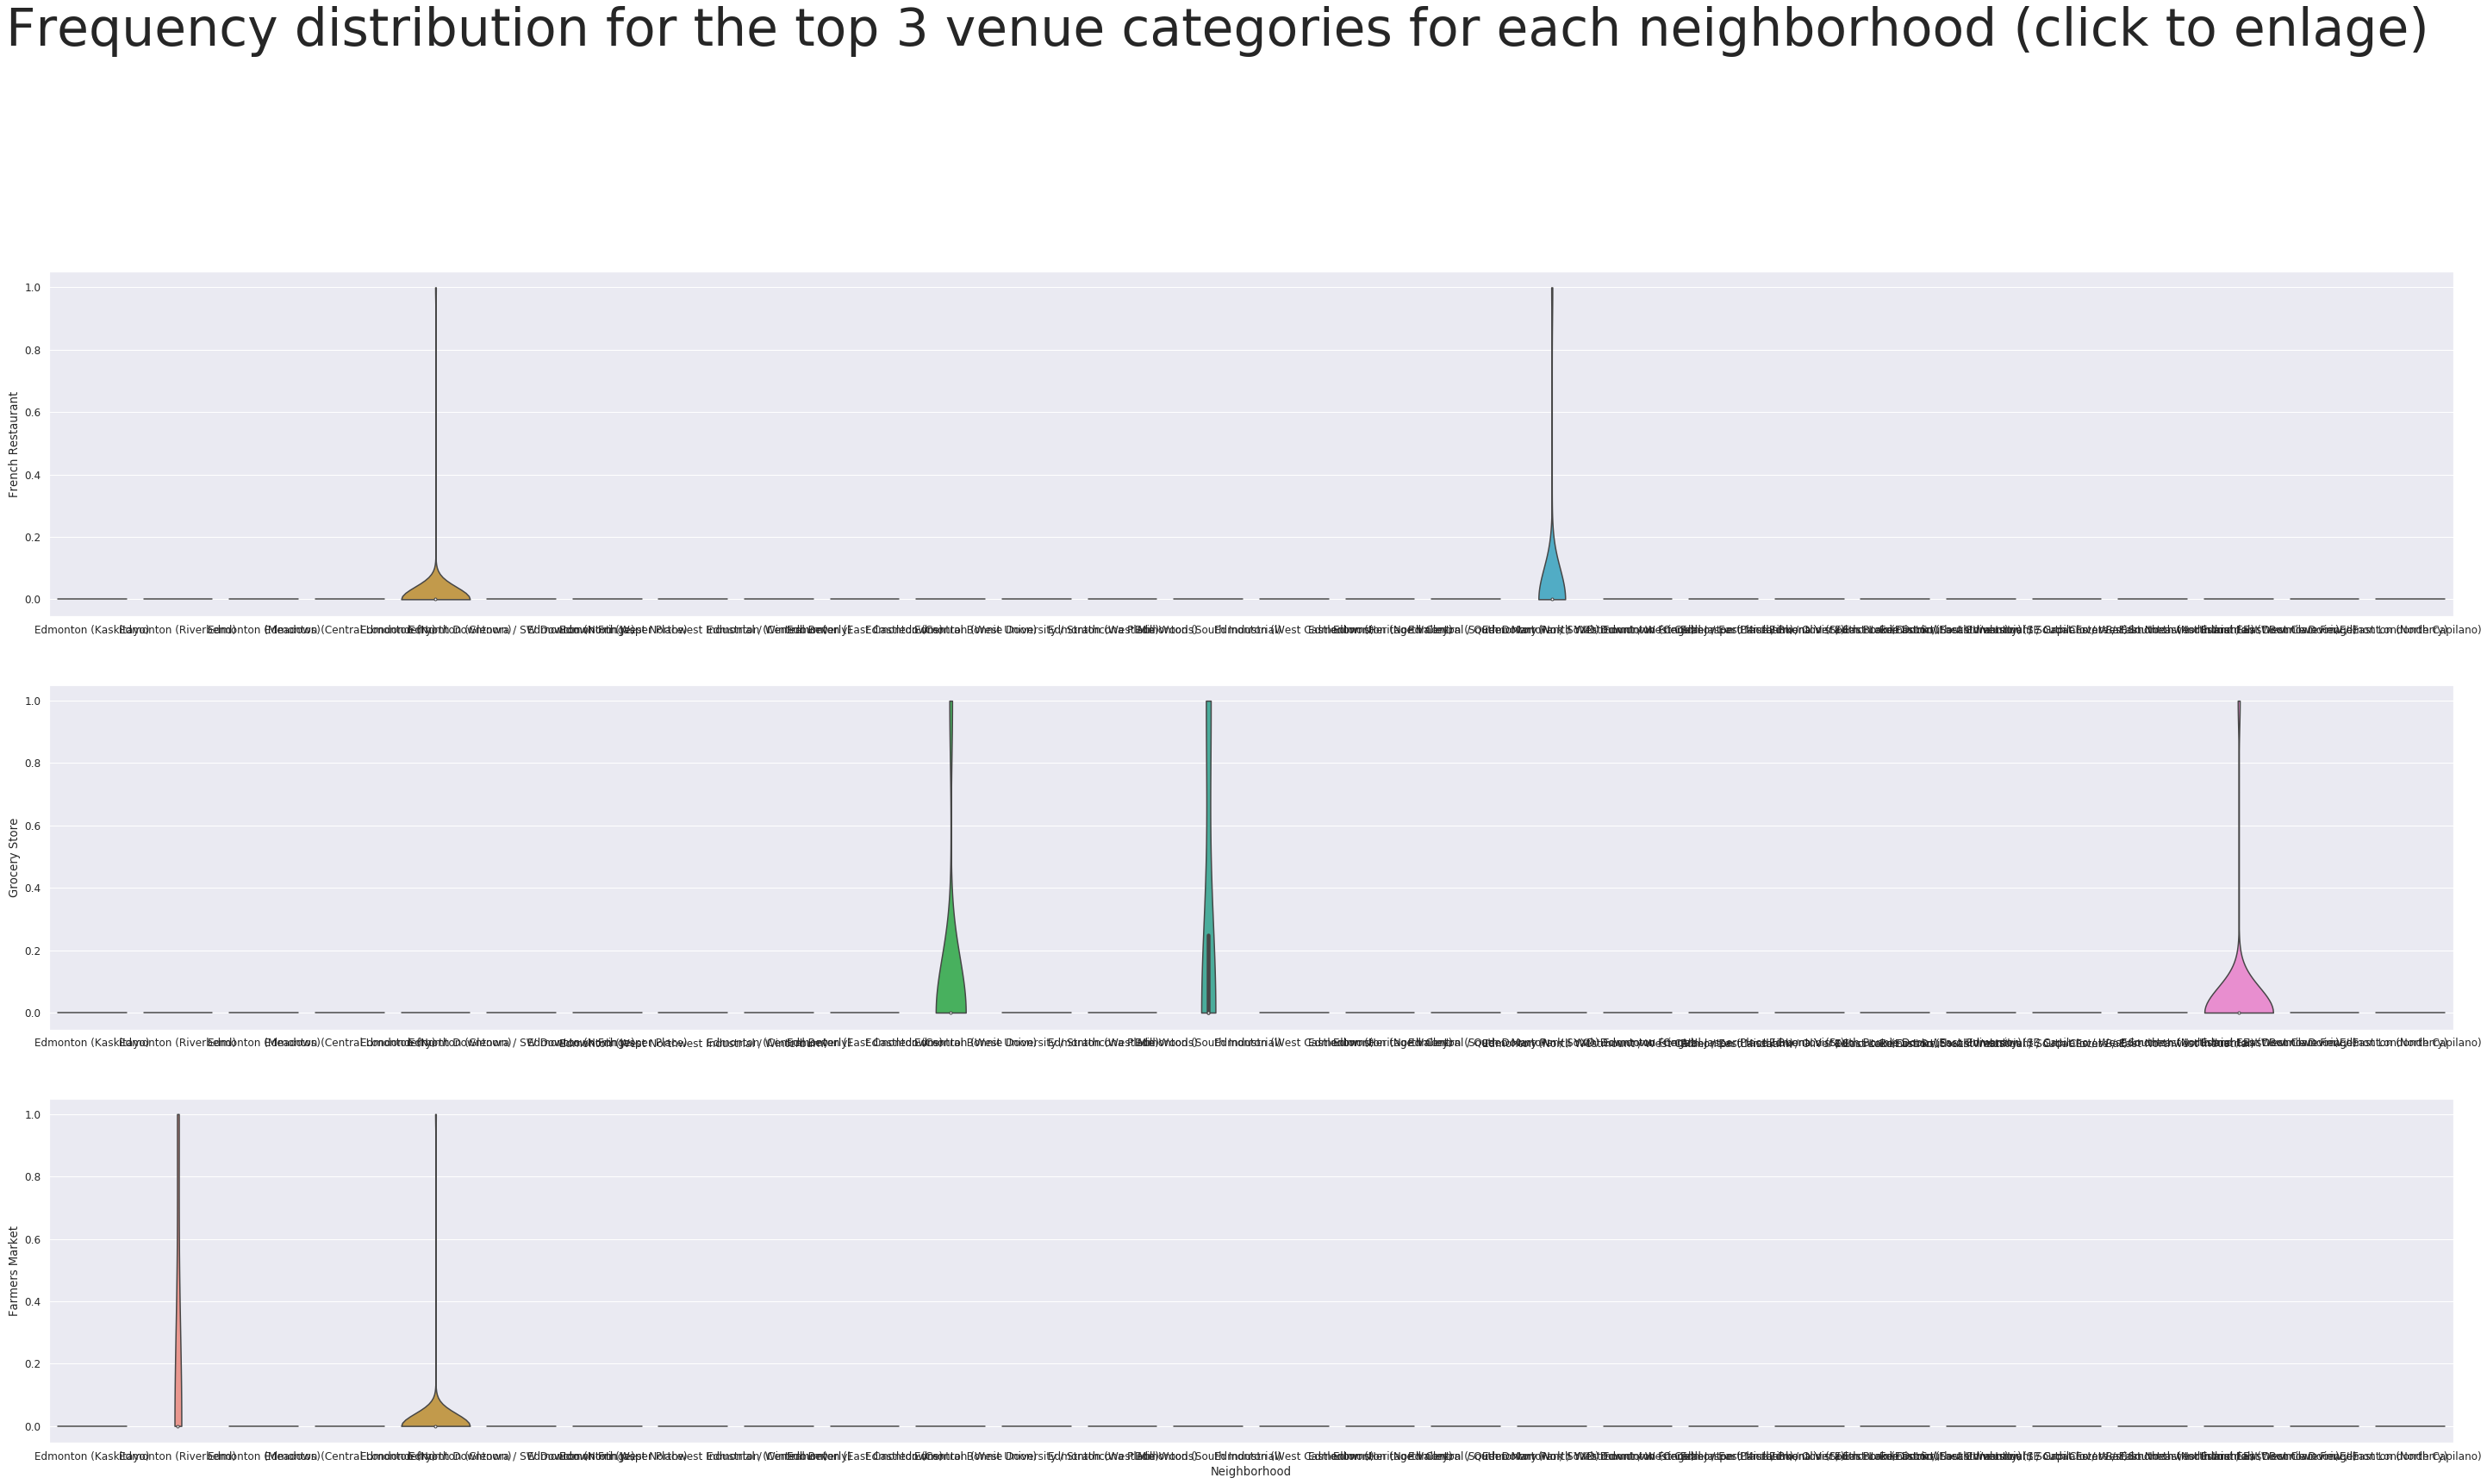

In [53]:
# Explore a plot of this data (a violin plot is used which is a density estimation of the underlying distribution).
# The top 3 venue types as specified by the client for each neighborhood are used for the plotting.

import seaborn as sns

fig = plt.figure(figsize=(50,25))
sns.set(font_scale=1.1)

ax = plt.subplot(3,1,1)
sns.violinplot(x="Neighborhood", y="French Restaurant", data=edmonton_onehot, cut=0);
plt.xlabel("")

ax = plt.subplot(3,1,2)
sns.violinplot(x="Neighborhood", y="Grocery Store", data=edmonton_onehot, cut=0);
plt.xlabel("")

plt.subplot(3,1,3)
sns.violinplot(x="Neighborhood", y="Farmers Market", data=edmonton_onehot, cut=0);

ax.text(-1.0, 3.1, 'Frequency distribution for the top 3 venue categories for each neighborhood (click to enlage)', fontsize=60)
plt.savefig ("Distribution_Frequency_Venues_3_categories.png", dpi=240)

As can be seen from the analysis, based on the presence of French restaurants, the following 12 neighborhoods can be removed from the list of possible locations as they already have a presence of French restaurants:
- Central Beverly
- East Southwest Industrial/South Clareview
- Ellerslie
- Glenora/SW Downtown
- Heritage Valley
- Landbank/Oliver/East Lake District
- North Westmount/West Calder
- South Downtown and Fringe
- West Castledowns
- West Clareview/East Londonderry
- West Lake District
- West Northwest Industries/Winterburn 

From the rest of the neighborhoods, based on the factor of nearness to raw materials for the restaurant business, the analysis is based on the availability of Grocery Stores or farmers Markets. 

Therefore the following list of 12 neighborhoods will provide a better choice of location of a new French restaurant considering that there is presently very few (or no) French restaurants and because they each have a relatively higher concentration of Grocery Stores or Farmers Markets:
- Central BonnieDoon
- Central Londonderry
- East Castledowns
- Meadows
- North Capilano
- North Jasper Place
- North&East Downtown Fringe
- Riverbend
- Capilano/West Southeast Industrial
- South BonnieDoon/East University
- South Industrial
- West University/Stratcona


### Availability of at least French Restaurant in each neighborhood chosen

The analysis could go further by eliminating every neighborhood that already has at least 1 French Restaurant. 

In [54]:
# function to repeat the exploring process to all the neighborhoods in Edmonton for specific category IDs
import urllib
def getNearbyVenues2(names, latitudes, longitudes, radius=5000, categoryIds=''):
    try:
        venues_list=[]
        for name, lat, lng in zip(names, latitudes, longitudes):
            #print(name)

            # create the API request URL
            url = 'https://api.foursquare.com/v2/venues/search?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, VERSION, lat, lng, radius, LIMIT)

            if (categoryIds != ''):
                url = url + '&categoryId={}'
                url = url.format(categoryIds)

            # make the GET request
            response = requests.get(url).json()
            results = response["response"]['venues']

            # return only relevant information for each nearby venue
            for v in results:
                success = False
                try:
                    category = v['categories'][0]['name']
                    success = True
                except:
                    pass

                if success:
                    venues_list.append([(
                        name, 
                        lat, 
                        lng, 
                        v['name'], 
                        v['location']['lat'], 
                        v['location']['lng'],
                        v['categories'][0]['name']
                    )])

        nearby_venues2 = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
        nearby_venues.columns = ['Neighborhood', 
                  'Latitude', 
                  'Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    except:
        print(url)
        print(response)
        print(results)
        print(nearby_venues2)

    return(nearby_venues2)

In [55]:
# Use category id 4bf58dd8d48988d10c941735 to only get all french restaurant venues in Edmonton
edmonton_venues_frenchR = getNearbyVenues2(names=edmonton['Neighborhood'], latitudes=edmonton['Latitude'], longitudes=edmonton['Longitude'], radius=1000, categoryIds='4bf58dd8d48988d10c941735')
edmonton_venues_frenchR

https://api.foursquare.com/v2/venues/search?&client_id=4MZ4U1YKCDSQCP5CGALCWZYFTEU0GLKTJ1UBLYDD15CQZ1VI&client_secret=AI505REPCBBLDK4VR3MQASWG2LKOAL2Z3LZ4JO1RJUIEQMCK&v=20191213&ll=53.548,-113.432&radius=1000&limit=100&categoryId=4bf58dd8d48988d10c941735
{'meta': {'code': 200, 'requestId': '5dffe141f7706a001bb32a17'}, 'response': {'venues': []}}
[]
                                                    0       1        2  \
0                           Edmonton (North Downtown)  53.543 -113.497   
1                           Edmonton (North Downtown)  53.543 -113.497   
2                           Edmonton (North Downtown)  53.543 -113.497   
3                           Edmonton (North Downtown)  53.543 -113.497   
4                           Edmonton (North Downtown)  53.543 -113.497   
5                           Edmonton (North Downtown)  53.543 -113.497   
6                           Edmonton (North Downtown)  53.543 -113.497   
7                           Edmonton (North Downtown)  53

,0,1,2,3,4,5,6
0,Edmonton (North Downtown),53.543,-113.497,The Creperie,53.543574,-113.497626,Creperie
1,Edmonton (North Downtown),53.543,-113.497,LaRonde Restaurant - Chateau Lacombe,53.539262,-113.494050,French Restaurant
2,Edmonton (North Downtown),53.543,-113.497,Normand's Bistro,53.542918,-113.488878,French Restaurant
3,Edmonton (North Downtown),53.543,-113.497,Café Select,53.539407,-113.503060,French Restaurant
4,Edmonton (North Downtown),53.543,-113.497,9th Street Bistro,53.537768,-113.508445,French Restaurant
5,Edmonton (North Downtown),53.543,-113.497,The Marc,53.538355,-113.503017,French Restaurant
6,Edmonton (North Downtown),53.543,-113.497,Woodwork,53.541991,-113.490587,BBQ Joint
7,Edmonton (North Downtown),53.543,-113.497,Hardware Grill,53.542413,-113.485617,French Restaurant
8,Edmonton (North Jasper Place),53.546,-113.596,Gini's Restaurant,53.545543,-113.582920,French Restaurant
9,Edmonton (Central Bonnie Doon),53.522,-113.459,Cafe Bicyclette,53.522588,-113.466897,French Restaurant


In [56]:
frenchR_grouped = edmonton_venues_frenchR.groupby([0]).mean().reset_index()
frenchR_grouped

,0,1,2,4,5
0,Edmonton (Central Bonnie Doon),53.522,-113.459,53.522588,-113.466897
1,Edmonton (North Downtown),53.543,-113.497,53.540711,-113.496410
2,Edmonton (North Jasper Place),53.546,-113.596,53.545543,-113.582920
3,Edmonton (North and East Downtown Fringe),53.551,-113.492,53.542724,-113.490677
4,Edmonton (South Downtown / South Downtown Fringe),53.537,-113.510,53.539725,-113.509504


This reveals the following neighborhoods have at least one french restaurant: North Downtown, North Jasper Place, Central BonnieDoon, South Downtown Fringe, North&East Downtown Fringe.

It further reduces the list of favourable neighborhoods to 9:

- Central Londonderry
- East Castledowns
- Meadows
- North Capilano
- Riverbend
- Capilano/West Southeast Industrial
- South BonnieDoon/East University
- South Industrial
- West University/Stratcona



### Further analysis : Nearness to offices and professional venues

At this point, we have upto 9 neighborhoods to choose from. We understand that restaurants located around offices and business have a higher probability of getting customers than those that aren't. We can narrow down the present list by selecting the neighborhood that has the highest number of offices and professional venues

In [57]:
edmonton1 = edmonton.set_index('Neighborhood')
edmonton1

,Code,Latitude,Longitude
Neighborhood,,,
Edmonton (Kaskitayo),T6J,53.456,-113.521
Edmonton Southwest,T6M,53.459,-113.655
Edmonton (Riverbend),T6R,53.457,-113.580
Edmonton (Meadows),T6T,53.462,-113.371
Edmonton (Ellerslie),T6X,53.415,-113.418
Edmonton (Central Londonderry),T5C,53.600,-113.455
Edmonton (North Downtown),T5J,53.543,-113.497
Edmonton (Glenora / SW Downtown Fringe),T5N,53.544,-113.557
Edmonton (North Jasper Place),T5P,53.546,-113.596


In [58]:
edmonton2 = edmonton1.loc[['Edmonton (Central Londonderry)', 'Edmonton (East Castledowns)', 'Edmonton (Meadows)', 'Edmonton (North Capilano)', 'Edmonton (Riverbend)', 'Edmonton (SE Capilano / West Southeast Industrial / East Bonnie Doon)', 'Edmonton (South Bonnie Doon / East University)', 'Edmonton (South Industrial)', 'Edmonton (West University / Strathcona Place)']]
edmonton2

,Code,Latitude,Longitude
Neighborhood,,,
Edmonton (Central Londonderry),T5C,53.600,-113.455
Edmonton (East Castledowns),T5X,53.631,-113.524
Edmonton (Meadows),T6T,53.462,-113.371
Edmonton (North Capilano),T6A,53.548,-113.432
Edmonton (Riverbend),T6R,53.457,-113.580
Edmonton (SE Capilano / West Southeast Industrial / East Bonnie Doon),T6B,53.513,-113.419
Edmonton (South Bonnie Doon / East University),T6E,53.491,-113.480
Edmonton (South Industrial),T6N,53.465,-113.478
Edmonton (West University / Strathcona Place),T6G,53.521,-113.532


In [59]:
edmonton2.reset_index(inplace=True)
edmonton2

,Neighborhood,Code,Latitude,Longitude
0,Edmonton (Central Londonderry),T5C,53.600,-113.455
1,Edmonton (East Castledowns),T5X,53.631,-113.524
2,Edmonton (Meadows),T6T,53.462,-113.371
3,Edmonton (North Capilano),T6A,53.548,-113.432
4,Edmonton (Riverbend),T6R,53.457,-113.580
5,Edmonton (SE Capilano / West Southeast Industr...,T6B,53.513,-113.419
6,Edmonton (South Bonnie Doon / East University),T6E,53.491,-113.480
7,Edmonton (South Industrial),T6N,53.465,-113.478
8,Edmonton (West University / Strathcona Place),T6G,53.521,-113.532


In [60]:
# Use category id 4d4b7105d754a06375d81259 to only get all professional & office venues in Edmonton
edmonton_venues_offices = getNearbyVenues2(names=edmonton2['Neighborhood'], latitudes=edmonton2['Latitude'], longitudes=edmonton2['Longitude'], radius=1000, categoryIds='4d4b7105d754a06375d81259')
edmonton_venues_offices

https://api.foursquare.com/v2/venues/search?&client_id=4MZ4U1YKCDSQCP5CGALCWZYFTEU0GLKTJ1UBLYDD15CQZ1VI&client_secret=AI505REPCBBLDK4VR3MQASWG2LKOAL2Z3LZ4JO1RJUIEQMCK&v=20191213&ll=53.521,-113.532&radius=1000&limit=100&categoryId=4d4b7105d754a06375d81259
{'meta': {'code': 200, 'requestId': '5dffe1389da7ee001c173505'}, 'response': {'venues': [{'id': '519294ce501979421ed399b8', 'name': 'Lister Conference Centre & Guest Rooms', 'location': {'address': 'University of Alberta', 'crossStreet': 'at 116 St & 87 Ave', 'lat': 53.522017971000665, 'lng': -113.53033304214478, 'labeledLatLngs': [{'label': 'display', 'lat': 53.522017971000665, 'lng': -113.53033304214478}], 'distance': 158, 'postalCode': 'T6G 2H6', 'cc': 'CA', 'city': 'Edmonton', 'state': 'AB', 'country': 'Canada', 'formattedAddress': ['University of Alberta (at 116 St & 87 Ave)', 'Edmonton AB T6G 2H6', 'Canada']}, 'categories': [{'id': '4bf58dd8d48988d1fa931735', 'name': 'Hotel', 'pluralName': 'Hotels', 'shortName': 'Hotel', 'icon': 

,0,1,2,3,4,5,6
0,Edmonton (Central Londonderry),53.600,-113.455,McClure United church,53.600087,-113.455801,Church
1,Edmonton (Central Londonderry),53.600,-113.455,Millennium Pavilion,53.600541,-113.457390,Building
2,Edmonton (Central Londonderry),53.600,-113.455,The Church of Jesus Christ of Latter-day Saints,53.603099,-113.456201,Church
3,Edmonton (Central Londonderry),53.600,-113.455,Londonderry Library (EPL),53.601806,-113.446391,Library
4,Edmonton (Central Londonderry),53.600,-113.455,Londonderry Mall,53.602142,-113.445466,Shopping Mall
...,...,...,...,...,...,...,...
293,Edmonton (West University / Strathcona Place),53.521,-113.532,Rutherford Lounge,53.525976,-113.520905,Lounge
294,Edmonton (West University / Strathcona Place),53.521,-113.532,The Stollery U Of A Hospital,53.520576,-113.524647,Hospital
295,Edmonton (West University / Strathcona Place),53.521,-113.532,Kaye Edmonton Clinic,53.518412,-113.526235,Medical Center
296,Edmonton (West University / Strathcona Place),53.521,-113.532,Orthopedic Associates,53.512470,-113.520058,Doctor's Office


#### Let's find out among the 9 possible locations, which one has the most number offices & professional venues, and visualize this using a bar chart

In [61]:
offices_grouped = edmonton_venues_offices.groupby([0]).count().reset_index()
offices_grouped

,0,1,2,3,4,5,6
0,Edmonton (Central Londonderry),44,44,44,44,44,44
1,Edmonton (East Castledowns),16,16,16,16,16,16
2,Edmonton (Meadows),15,15,15,15,15,15
3,Edmonton (North Capilano),31,31,31,31,31,31
4,Edmonton (Riverbend),20,20,20,20,20,20
5,Edmonton (SE Capilano / West Southeast Industr...,43,43,43,43,43,43
6,Edmonton (South Bonnie Doon / East University),38,38,38,38,38,38
7,Edmonton (South Industrial),44,44,44,44,44,44
8,Edmonton (West University / Strathcona Place),47,47,47,47,47,47


In [62]:
offices_grouped.drop(offices_grouped.columns[[2, 3, 4, 5, 6]], axis=1, inplace=True)
offices_grouped

,0,1
0,Edmonton (Central Londonderry),44
1,Edmonton (East Castledowns),16
2,Edmonton (Meadows),15
3,Edmonton (North Capilano),31
4,Edmonton (Riverbend),20
5,Edmonton (SE Capilano / West Southeast Industr...,43
6,Edmonton (South Bonnie Doon / East University),38
7,Edmonton (South Industrial),44
8,Edmonton (West University / Strathcona Place),47


In [63]:
offices_grouped.columns = ['Neighborhood', 'Number of offices']
offices_grouped

,Neighborhood,Number of offices
0,Edmonton (Central Londonderry),44
1,Edmonton (East Castledowns),16
2,Edmonton (Meadows),15
3,Edmonton (North Capilano),31
4,Edmonton (Riverbend),20
5,Edmonton (SE Capilano / West Southeast Industr...,43
6,Edmonton (South Bonnie Doon / East University),38
7,Edmonton (South Industrial),44
8,Edmonton (West University / Strathcona Place),47


In [64]:
offices_grouped.set_index('Neighborhood', inplace=True)
offices_grouped

,Number of offices
Neighborhood,
Edmonton (Central Londonderry),44
Edmonton (East Castledowns),16
Edmonton (Meadows),15
Edmonton (North Capilano),31
Edmonton (Riverbend),20
Edmonton (SE Capilano / West Southeast Industrial / East Bonnie Doon),43
Edmonton (South Bonnie Doon / East University),38
Edmonton (South Industrial),44
Edmonton (West University / Strathcona Place),47


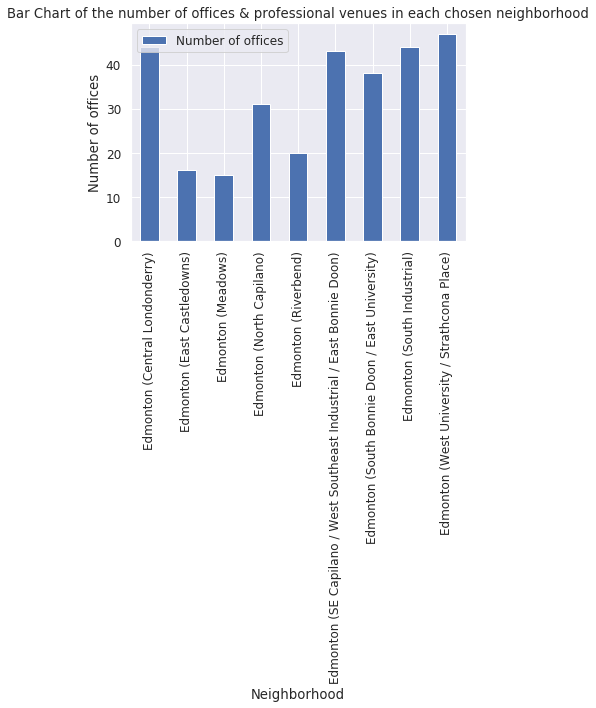

In [65]:
offices_grouped.plot(kind='bar')
plt.title('Bar Chart of the number of offices & professional venues in each chosen neighborhood')
plt.ylabel('Number of offices')
plt.xlabel('Neighborhood')
plt.show()

### We can now see that the neighborhood, West University/Strathcona Place is the best location to open a new French restaurant since it has no French Restaurant and has the highest number of offices and professional venues.